In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

### FORGE

форма массива X: (26, 2)


/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


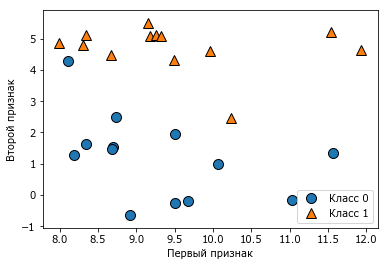

In [2]:
# генерируем набор данных
X, y = mglearn.datasets.make_forge()
# строим график для набора данных
%matplotlib inline
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("форма массива X: {}".format(X.shape))

### WAVE

Text(0,0.5,'Целевая переменная')

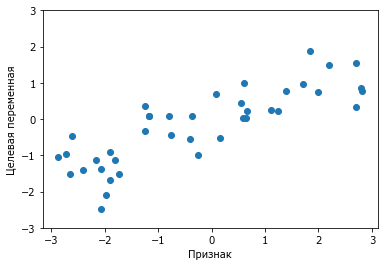

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")

### Breast Cancer

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
print("Ключи cancer(): \n{}".format(cancer.keys()))
print()

print("Форма массива data для набора cancer: {}".format(cancer.data.shape))
print()

print("Количество примеров для каждого класса:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))
print()

print("Имена признаков:\n{}".format(cancer.feature_names))

Ключи cancer(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Форма массива data для набора cancer: (569, 30)

Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}

Имена признаков:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### BOSTON

In [6]:
from sklearn.datasets import load_boston
boston = load_boston()

print("ключи: {}".format(boston.keys()))
print()

print("форма массива data для набора boston: {}".format(boston.data.shape))
print()

print("имена признаков: {}".format(boston.feature_names))

ключи: dict_keys(['data', 'target', 'feature_names', 'DESCR'])

форма массива data для набора boston: (506, 13)

имена признаков: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
X, y = mglearn.datasets.load_extended_boston()
print("форма массива X: {}".format(X.shape))

форма массива X: (506, 104)


# Сравнение алгоритмов

### k-nearest neighbors

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


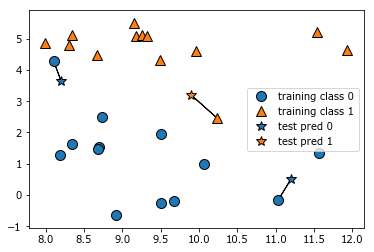

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


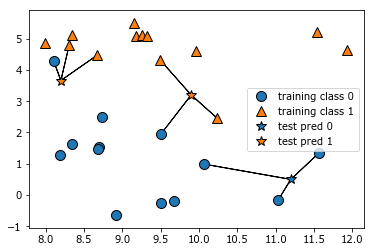

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [10]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


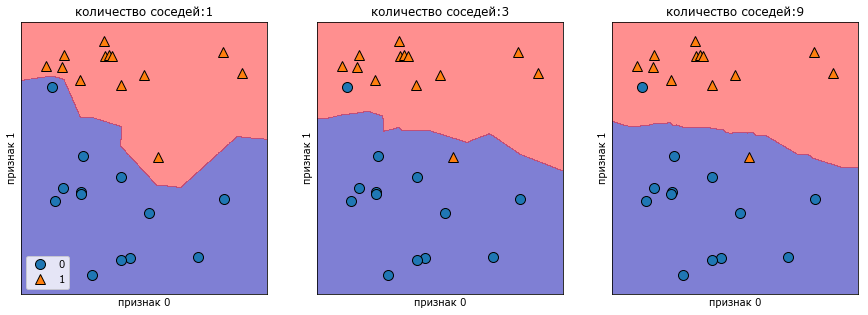

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for n_neighbors, ax in zip([1, 3, 9], axes):
    # создаем объект-классификатор и подгоняем в одной строке
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.5)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
    axes[0].legend(loc=3)

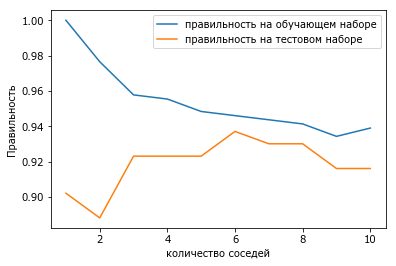

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []

# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # строим модель
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # записываем правильность на обучающем наборе
    training_accuracy.append(clf.score(X_train, y_train))
    # записываем правильность на тестовом наборе
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

### knn_regression

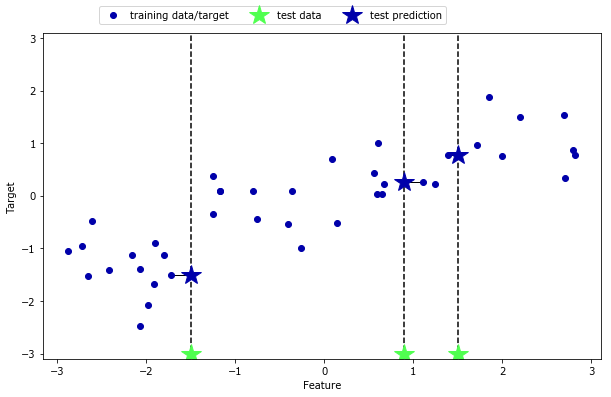

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

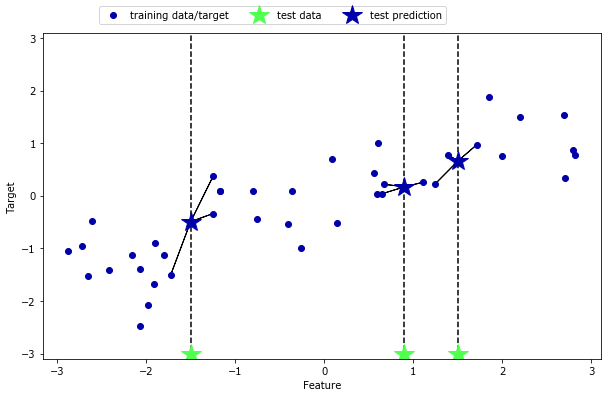

In [15]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [16]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)
# разбиваем набор данных wave на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# создаем экземпляр модели и устанавливаем количество соседей равным 3
reg = KNeighborsRegressor(n_neighbors=3)
# подгоняем модель с использованием обучающих данных и обучающих ответов
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [17]:
print("Прогнозы для тестового набора:\n{}".format(reg.predict(X_test)))
print("R^2 на тестовом наборе: {:.5f}".format(reg.score(X_test, y_test)))

Прогнозы для тестового набора:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
R^2 на тестовом наборе: 0.83442


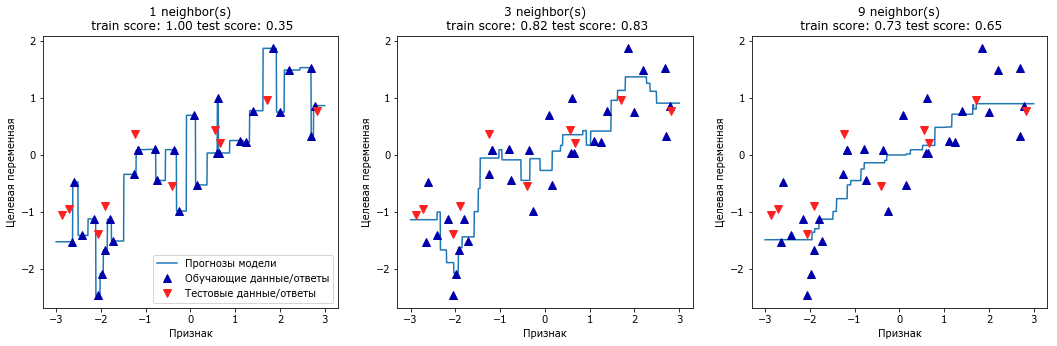

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
# создаем 1000 точек данных, равномерно распределенных между -3 и 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # получаем прогнозы, используя 1, 3, и 9 соседей
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("Признак")
    ax.set_ylabel("Целевая переменная")
axes[0].legend(["Прогнозы модели", "Обучающие данные/ответы",
"Тестовые данные/ответы"], loc="best")

### Linear regression

w[0]: 0.393906  b: -0.031804


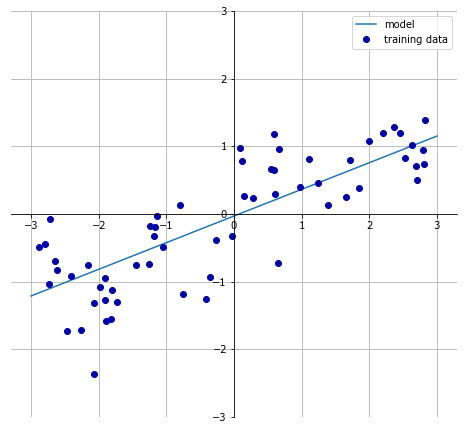

In [19]:
mglearn.plots.plot_linear_regression_wave()

In [20]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [21]:
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

print()

print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746

R-квадрат на обучающем наборе: 0.67
R-квадрат на тестовом наборе: 0.66


In [22]:
X, y = mglearn.datasets.load_extended_boston()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [23]:
print("R-квадрат на обучающем наборе: {:.2f}".format(lr.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lr.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.61


### Гребневая регрессия

In [24]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.89
R-квадрат на тестовом наборе: 0.75


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))

R-квадрат на обучающем наборе: 0.79
R-квадрат на тестовом наборе: 0.64


In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(ridge01.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(ridge01.score(X_test, y_test)))
print(len(ridge01.coef_))

R-квадрат на обучающем наборе: 0.93
R-квадрат на тестовом наборе: 0.77
104


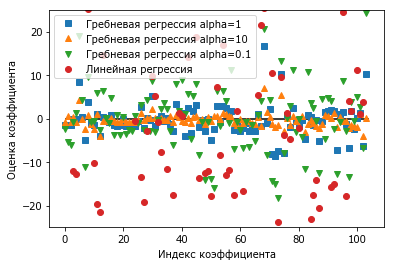

In [27]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge01.coef_, 'v', label="Гребневая регрессия alpha=0.1")
plt.plot(lr.coef_, 'o', label="Линейная регрессия")
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

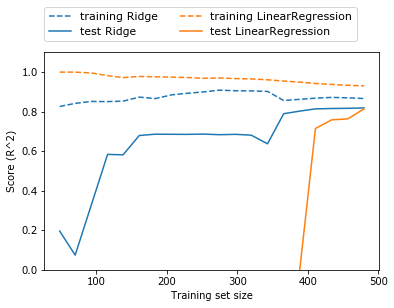

In [28]:
mglearn.plots.plot_ridge_n_samples()

### Lasso

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso.score(X_train, y_train)))
print("R-квадрат на контрольном наборе: {:.2f}".format(lasso.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

R-квадрат на обучающем наборе: 0.29
R-квадрат на контрольном наборе: 0.21
Количество использованных признаков: 4


In [30]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.90
R-квадрат на тестовом наборе: 0.77
Количество использованных признаков: 33


In [31]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("R-квадрат на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("R-квадрат на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))

R-квадрат на обучающем наборе: 0.95
R-квадрат на тестовом наборе: 0.64
Количество использованных признаков: 94


Text(0,0.5,'Оценка коэффициента')

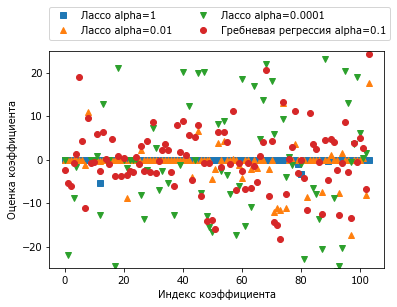

In [32]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Гребневая регрессия alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")

/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


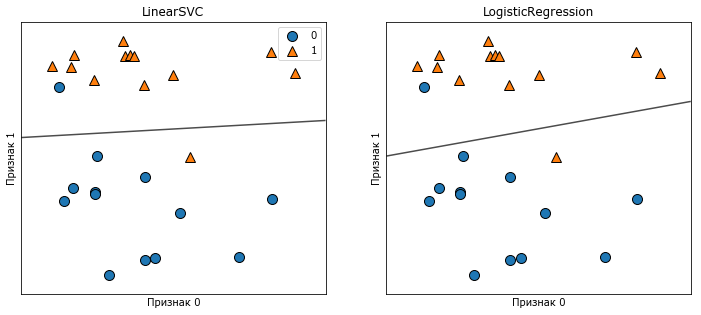

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Признак 0")
    ax.set_ylabel("Признак 1")

axes[0].legend()

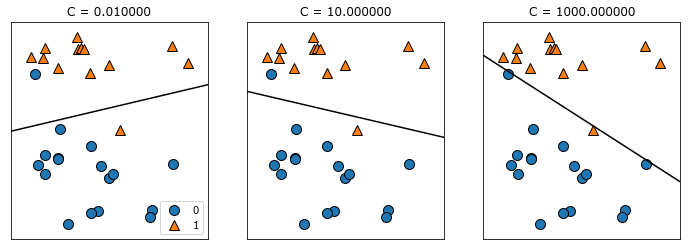

In [34]:
mglearn.plots.plot_linear_svc_regularization()

In [35]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg.score(X_test, y_test)))

Правильность на обучающем наборе: 0.953
Правильность на тестовом наборе: 0.958


In [36]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg100.score(X_test, y_test)))

Правильность на обучающем наборе: 0.972
Правильность на тестовом наборе: 0.965


In [37]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(logreg001.score(X_test, y_test)))

Правильность на обучающем наборе: 0.934
Правильность на тестовом наборе: 0.930


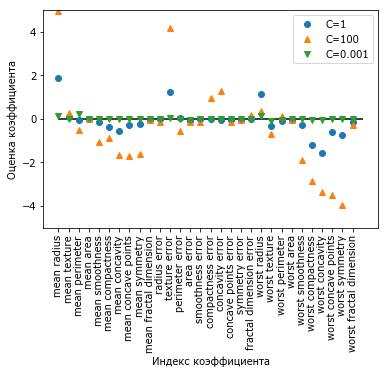

In [38]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.legend()

Правильность на обучении для логрегрессии l1 с C=0.001: 0.91
Правильность на тесте для логрегрессии l1 с C=0.001: 0.92

Правильность на обучении для логрегрессии l1 с C=1.000: 0.96
Правильность на тесте для логрегрессии l1 с C=1.000: 0.96

Правильность на обучении для логрегрессии l1 с C=100.000: 0.99
Правильность на тесте для логрегрессии l1 с C=100.000: 0.98



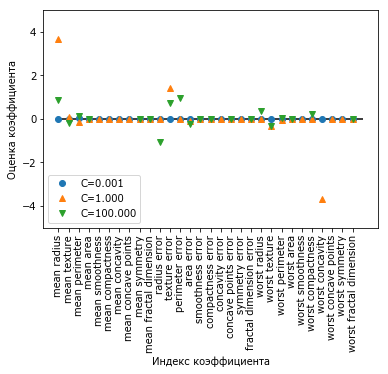

In [39]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Правильность на обучении для логрегрессии l1 с C={:.3f}: {:.2f}".format(
            C, lr_l1.score(X_train, y_train)))
    print("Правильность на тесте для логрегрессии l1 с C={:.3f}: {:.2f}".format(
            C, lr_l1.score(X_test, y_test)))
    print()
    
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.ylim(-5, 5)
plt.legend(loc=3)

### Для мультиклассовой классификации

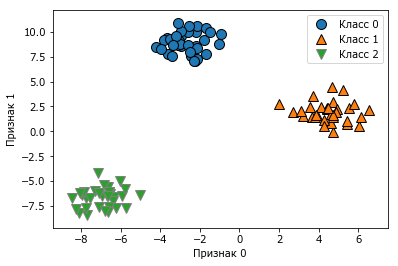

In [40]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(["Класс 0", "Класс 1", "Класс 2"])

In [41]:
linear_svm = LinearSVC().fit(X, y)
print("Форма коэффициента: ", linear_svm.coef_.shape)
print(linear_svm.coef_)
print("Форма константы: ", linear_svm.intercept_.shape)
print(linear_svm.intercept_)

Форма коэффициента:  (3, 2)
[[-0.17492667  0.2314021 ]
 [ 0.47621328 -0.06936721]
 [-0.18914534 -0.20399725]]
Форма константы:  (3,)
[-1.0774555   0.13140254 -0.08604895]


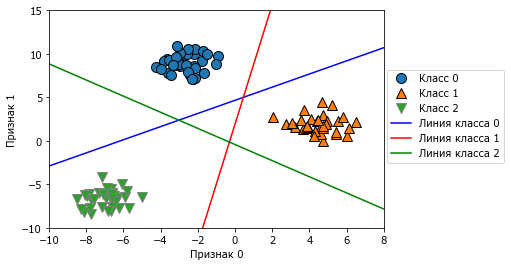

In [42]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
# print([i for i in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g'])])

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
'Линия класса 2'], loc=(1.01, 0.3))

Text(0,0.5,'Признак 1')

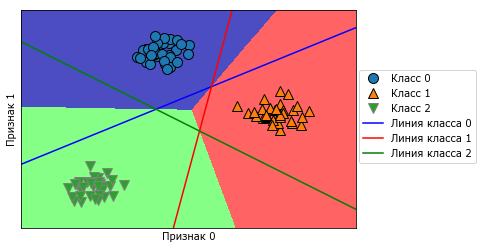

In [43]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                    ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Класс 0', 'Класс 1', 'Класс 2', 'Линия класса 0', 'Линия класса 1',
'Линия класса 2'], loc=(1.01, 0.3))
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")

### Наивные байесовские классификаторы

In [44]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [45]:
counts = {}

for label in np.unique(y):
    # итерируем по каждому классу
    # подсчитываем (суммируем) элементы 1 по признаку
    counts[label] = X[y == label].sum(axis=0)
print("Частоты признаков:\n{}".format(counts))

Частоты признаков:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### Деревья

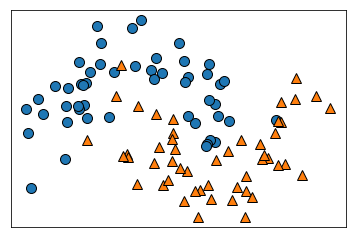

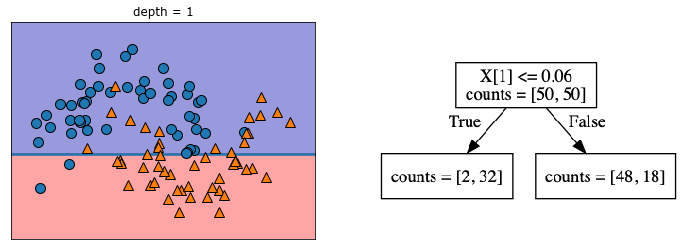

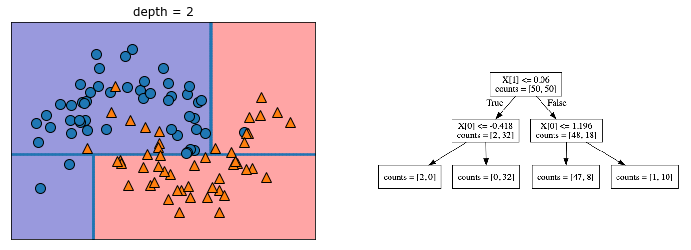

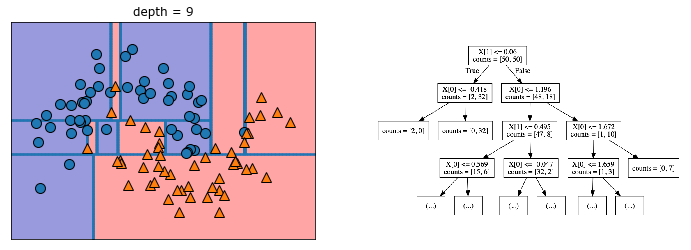

In [46]:
mglearn.plots.plot_tree_progressive()

In [47]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.937


In [48]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(tree.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(tree.score(X_test, y_test)))

Правильность на обучающем наборе: 0.988
Правильность на тестовом наборе: 0.951


In [49]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

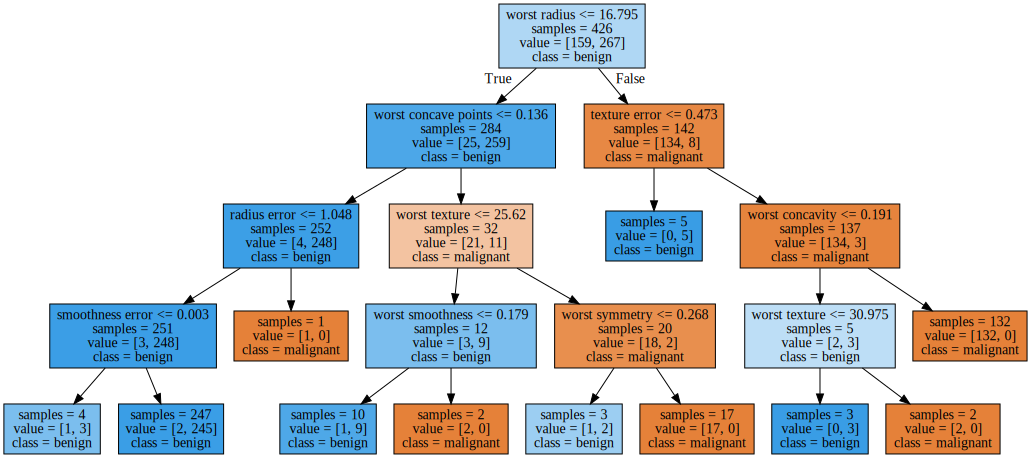

In [50]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=42)
clf = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf = clf.fit(X_train, y_train)

import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None)

In [52]:
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("cancer.pdf")

True

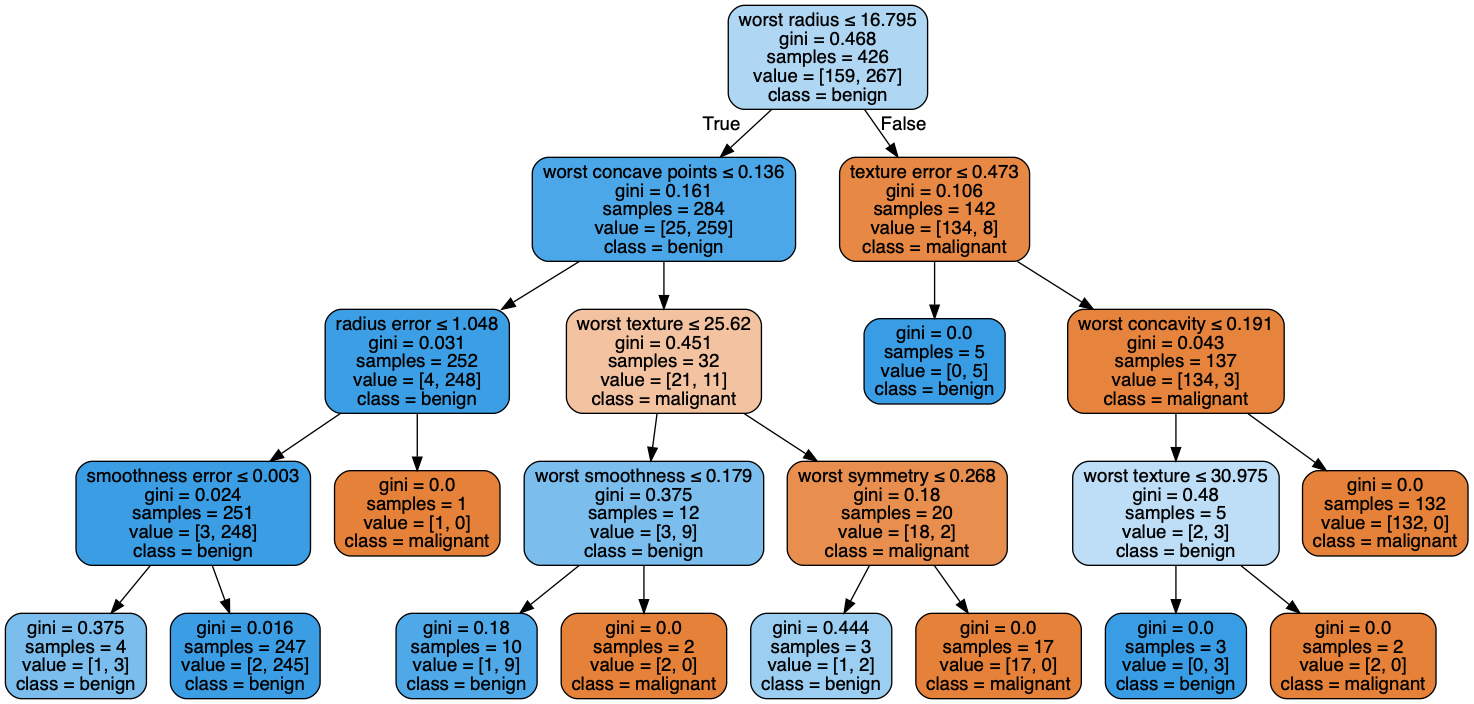

In [53]:
from IPython.display import Image
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=cancer.feature_names,
                                class_names=cancer.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [54]:
print("Важности признаков:\n{}".format(clf.feature_importances_))

Важности признаков:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


In [55]:
for name, score in zip(cancer["feature_names"], clf.feature_importances_):
    print(name, score)

mean radius 0.0
mean texture 0.0
mean perimeter 0.0
mean area 0.0
mean smoothness 0.0
mean compactness 0.0
mean concavity 0.0
mean concave points 0.0
mean symmetry 0.0
mean fractal dimension 0.0
radius error 0.010197368202069328
texture error 0.0483982536186494
perimeter error 0.0
area error 0.0
smoothness error 0.002415595085315826
compactness error 0.0
concavity error 0.0
concave points error 0.0
symmetry error 0.0
fractal dimension error 0.0
worst radius 0.7268285094603201
worst texture 0.045815897088866304
worst perimeter 0.0
worst area 0.0
worst smoothness 0.014157702104714051
worst compactness 0.0
worst concavity 0.0181879968644502
worst concave points 0.12211319926548449
worst symmetry 0.01188547831013032
worst fractal dimension 0.0


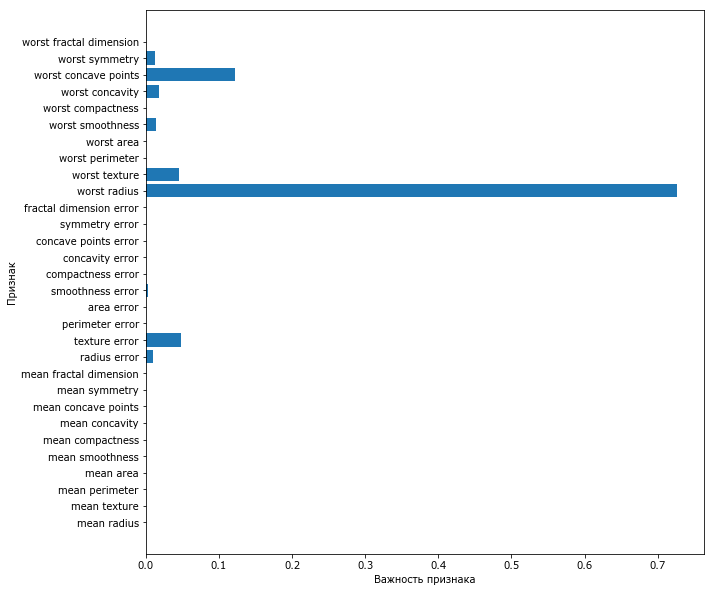

In [56]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.figure(figsize=(10,10))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(clf)

Feature importances: [0. 1.]


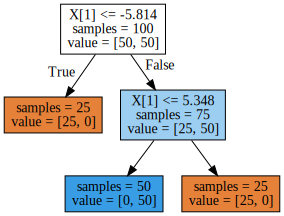

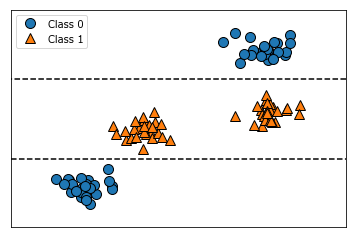

In [57]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


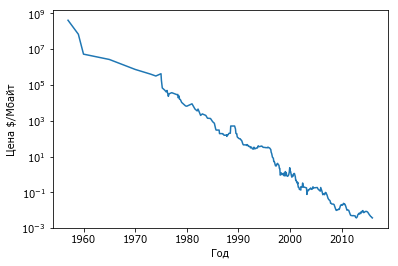

In [58]:
import pandas as pd
ram_prices = pd.read_csv("~/Downloads/introduction_to_ml_with_python/data/ram_price.csv")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Год")
plt.ylabel("Цена $/Мбайт")
print(ram_prices.head())

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# используем исторические данные для прогнозирования цен после 2000 года
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# прогнозируем цены по датам
X_train = data_train.date[:, np.newaxis]

# мы используем логпреобразование, что получить простую взаимосвязь между данными и откликом
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor(max_depth=4).fit(X_train, y_train)
# print(tree.score(X_train, y_train))
linear_reg = LinearRegression().fit(X_train, y_train)

# прогнозируем по всем данным
X_all = ram_prices.date[:, np.newaxis]
# print(linear_reg.score(data_test.date[:, np.newaxis], np.log(data_test.price)))
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# экспоненцируем, чтобы обратить логарифмическое преобразование
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

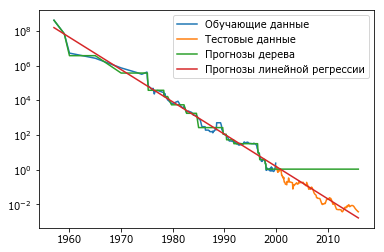

In [60]:
plt.semilogy(data_train.date, data_train.price, label="Обучающие данные")
plt.semilogy(data_test.date, data_test.price, label="Тестовые данные")
plt.semilogy(ram_prices.date, price_tree, label="Прогнозы дерева")
plt.semilogy(ram_prices.date, price_lr, label="Прогнозы линейной регрессии")
plt.legend()

### Random forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [62]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

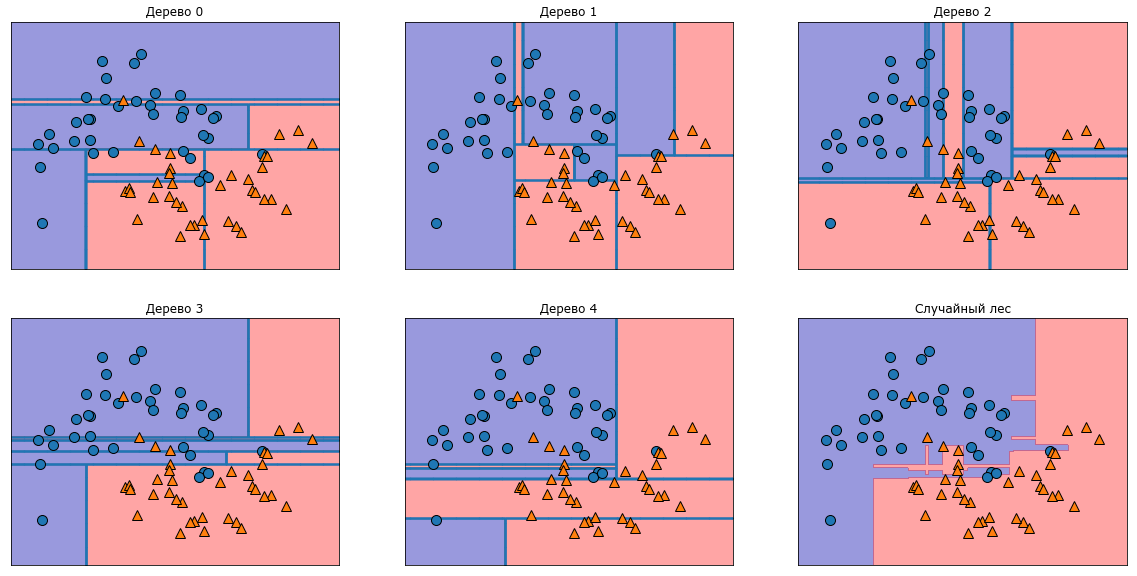

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Дерево {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
alpha=.4)
axes[-1, -1].set_title("Случайный лес")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.3f}".format(forest.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.972


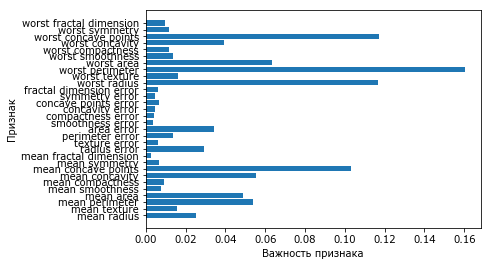

In [65]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center'
            )
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Важность признака")
    plt.ylabel("Признак")
plot_feature_importances_cancer(forest)